# Tarea 1B
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

### Nota importante
A partir de ahora utilizaremos el paquete `DifferentialEquations`, que tiene ya implementados los integradores de Euler, Runge-Kutta, y otros. Haga todos los ejercicios utilizando este paquete.

In [1]:
#using Pkg
#Pkg.add("DifferentialEquations")
using DifferentialEquations
using Plots
using LinearAlgebra

## Problema 1
En el directorio `Dipolo_mag_3d` encontrará un notebook de Julia que realiza una integración de una partícula cargada en presencia de un dipolo magnético. Este notebook utiliza `DifferentialEquations` para resolver dicho problema. Juegue con las soluciones y la librería, y trate de entender cómo funciona. Ejecute distintas condiciones initiales, cambie las tolerancias, cambie los métodos, etc. La idea es únicamente que se familiarize con el paquete, no hace falta que presente nada respecto a este ejercicio.


*Nota: si quiere probar otros métodos además de Euler y Runge Kutta, puede consultar los métodos disponibles en el paquete en 
https://diffeq.sciml.ai/stable/solvers/ode_solve/*

*Puede consultar también https://diffeq.sciml.ai/stable/tutorials/ode_example/ para un pequeño tutorial del paquete.*

In [42]:

function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:] - sol_2(t)[1:2:end],2)/norm(sol_2(t)[1:2:end]-sol_4(t)[1:4:end],2)
end

Q (generic function with 1 method)

In [43]:

f(y,t,λ)= -y
y0=1
T=(0.,20.)
N=101
dt=(T[2]-T[1])/N
prob=ODEProblem(f,y0,T)
sol1=solve(prob,RK4(),dt=dt,saveat=dt,adaptative=false);
sol2=solve(prob,RK4(),dt=dt/2.,saveat=dt/2,adaptative=false);
sol4=solve(prob,RK4(),dt=dt/4.,saveat=dt/4,adaptative=false);


#plot(sol1.t,map(t -> Q(t,sol1,sol2,sol4),sol1.t), yaxis=("Q",(0.,20)), label="Q");
#plot(sol1.t,map(t-> Q(t,sol1.u,sol2.u,sol4.u),sol1.t), yaxis=("Q",(0.,20)), label="Q")

In [47]:
sol1(0.0)[:]

LoadError: MethodError: no method matching getindex(::Float64, ::Colon)
[0mClosest candidates are:
[0m  getindex(::Number) at number.jl:93
[0m  getindex(::Number, [91m::Integer[39m) at number.jl:94
[0m  getindex(::Number, [91m::Integer...[39m) at number.jl:99
[0m  ...

In [20]:
sol1.t

102-element Vector{Float64}:
  0.0
  0.19801980198019803
  0.39603960396039606
  0.594059405940594
  0.7920792079207921
  0.9900990099009901
  1.188118811881188
  1.386138613861386
  1.5841584158415842
  1.7821782178217822
  1.9801980198019802
  2.1782178217821784
  2.376237623762376
  ⋮
 17.821782178217823
 18.019801980198018
 18.217821782178216
 18.415841584158414
 18.613861386138613
 18.81188118811881
 19.00990099009901
 19.207920792079207
 19.405940594059405
 19.603960396039604
 19.801980198019802
 20.0

In [29]:
f(y,t,λ)= -y
y0=1
T=(0.,20.)
N=101
dt=(T[2]-T[1])/N
prob=ODEProblem(f,y0,T)
sol=solve(prob,RK4(),dt=dt,reltol=1e-8,abstol=1e-8,saveat=dt,adaptative=false)
sol2=solve(prob,RK4(),dt=dt/2.,reltol=1e-8,abstol=1e-8,saveat=dt/2,adaptative=false)
sol4=solve(prob,RK4(),dt=dt/4.,reltol=1e-8,abstol=1e-8,saveat=dt/4,adaptative=false)
plot(sol_1.t,map(t -> Q(t,sol_1,sol_2,sol_4),sol_1.t), yaxis=("Q",(0.,20)), label="Q")

LoadError: UndefVarError: sol_1 not defined

In [30]:
Q(2,sol_1,sol_2,sol_4)

LoadError: UndefVarError: sol_1 not defined

In [31]:
sol2=solve(prob,RK4(),dt=dt/2,reltol=1e-8,abstol=1e-8,saveat=dt/2,adaptative=false)

retcode: Success
Interpolation: 1st order linear
t: 203-element Vector{Float64}:
  0.0
  0.09900990099009901
  0.19801980198019803
  0.297029702970297
  0.39603960396039606
  0.49504950495049505
  0.594059405940594
  0.693069306930693
  0.7920792079207921
  0.8910891089108911
  0.9900990099009901
  1.0891089108910892
  1.188118811881188
  ⋮
 18.91089108910891
 19.00990099009901
 19.10891089108911
 19.207920792079207
 19.306930693069308
 19.405940594059405
 19.504950495049506
 19.603960396039604
 19.702970297029704
 19.801980198019802
 19.900990099009903
 20.0
u: 203-element Vector{Float64}:
 1.0
 0.9057337405171141
 0.8203536082577704
 0.7430219425051638
 0.6729800433789764
 0.6095407318772781
 0.5520816070617254
 0.5000389391239936
 0.4529021389068924
 0.4102087484142227
 0.3715399038606039
 0.3365162268248674
 0.3047941013075095
 ⋮
 6.2643215597441725e-9
 5.680085766443684e-9
 5.154369575291257e-9
 4.681440991645267e-9
 4.255568020864019e-9
 3.871018668305881e-9
 3.522060939329163e-9

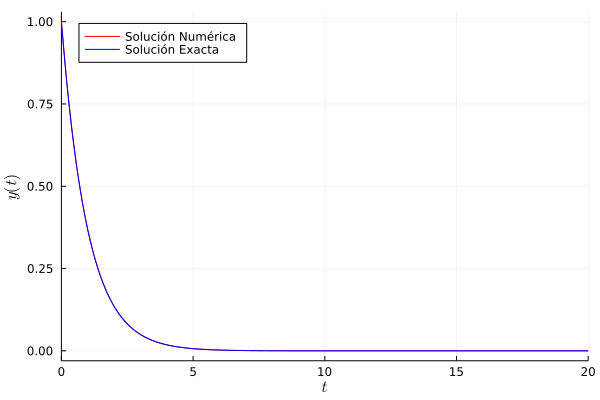

In [9]:
using Plots
x=0.:0.1:20.
plt = plot()
plot!(plt,sol,color=:red,label="Solución Numérica")
plot!(plt,x, y0*exp.(-1*x),color=:blue,label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

In [37]:
sol2[1:2:end,1]

102-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [34]:
Q_Euler=sqrt.((sol[:,1]-sol2[1:2:end,1]).(sol[:,1]-sol2[1:2:end,1]))./sqrt.((sol2[1:2:end,1]-sol4[1:4:end,1]).(sol2[1:2:end,1]-sol4[1:4:end,1]))

LoadError: MethodError: no method matching -(::Float64, ::Vector{Float64})
For element-wise subtraction, use broadcasting with dot syntax: scalar .- array
[0mClosest candidates are:
[0m  -([91m::VectorizationBase.CartesianVIndex[39m, ::Any) at /home/agustin/.julia/packages/VectorizationBase/pTvQj/src/cartesianvindex.jl:58
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at /home/agustin/.julia/packages/ChainRulesCore/Voykb/src/differentials/thunks.jl:30
[0m  -([91m::StaticArrays.StaticArray[39m, ::AbstractArray) at /home/agustin/.julia/packages/StaticArrays/vxjOO/src/linalg.jl:18
[0m  ...

***2b)*** Use el notebook *region_de_estabilidad* para investigar la región de convergencia de varios métodos de las librerías. Simplemente lea el notebook, entiéndalo, y corra los ejemplos, no hace falta que agregue nada. Pregunte en clase todas sus dudas.

## Problema 3
Construya su propio código para su ecuación favorita (alguna que no sea muy complicada, en la página del paquete DifferentialEquations de Julia hay varios ejemplos, o puede usar el dipolo 2D (orbitas coplanares)). Evolucione con distintas tolerancias, con paso fijo (vea como se hace esto en cada caso, use métodos fijos o adaptativos). Grafique diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales muy próximos.
Estudie convergencia, encuentre soluciones con distintos pasos (fijos), haga los cocientes y grafique el factor $Q$.

In [5]:
#Función auxiliar para calcular el factor Q.
#Simplemente calcule tres soluciones con distintos dt
#Si sol_1 usa N+1 puntos, sol_2 debe usar 2N+1 y sol4 usar 4N+1.
#No olvide utilizar `adaptive = false` y `saveat = dt` 
using LinearAlgebra

function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:] - sol_2(t)[1:2:end],2)/norm(sol_2(t)[1:2:end]-sol_4(t)[1:4:end],2)
end

Q (generic function with 1 method)

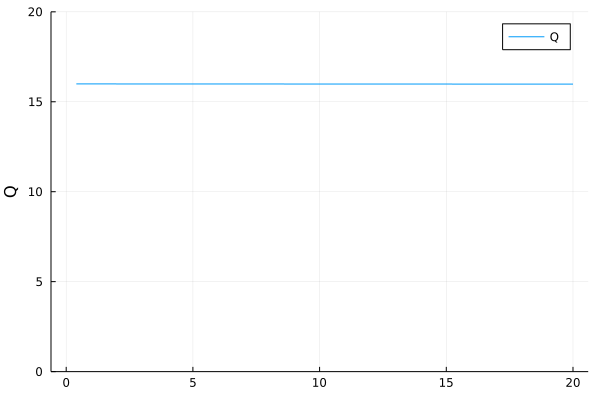

In [11]:
#Ejemplo simple
using Plots
λ = -im
T = (0.0,20.0)
N = 51
dt = (T[2]-T[1])/(N-1)
function CrecimientoExponencial!(du, u, par, t)
    λ = par
    du .= λ*u
end
y0 = [1.0+ 1.0im]
prob = ODEProblem(CrecimientoExponencial!,y0,T,λ);
#t = T[1]:dt:T[2]

sol_1 = solve(prob, RK4(), dt = dt  , saveat = dt,   adaptive = false);
sol_2 = solve(prob, RK4(), dt = dt/2, saveat = dt/2, adaptive = false);
sol_4 = solve(prob, RK4(), dt = dt/4, saveat = dt/4, adaptive = false);
plot(sol_1.t,map(t -> Q(t,sol_1,sol_2,sol_4),sol_1.t), yaxis=("Q",(0.,20)), label="Q")

In [48]:
sol_1(0.0)[:]

1-element Vector{ComplexF64}:
 1.0 + 1.0im

In [12]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz! (generic function with 1 method)

In [17]:
dt=0.01

0.01

In [18]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob,adaptive=false,dt=dt)

retcode: Success
Interpolation: automatic order switching interpolation
t: 10001-element Vector{Float64}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.060000000000000005
   0.07
   0.08
   0.09
   0.09999999999999999
   0.10999999999999999
   0.11999999999999998
   ⋮
  99.8900000000142
  99.9000000000142
  99.91000000001421
  99.92000000001421
  99.93000000001422
  99.94000000001422
  99.95000000001423
  99.96000000001423
  99.97000000001424
  99.98000000001424
  99.99000000001425
 100.0
u: 10001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9179244619166719, 0.26633997121142416, 0.0012639003891454018]
 [0.8679194609229505, 0.5117404148876176, 0.004655461336280941]
 [0.8453602141614959, 0.7446540743667971, 0.009835877706291622]
 [0.8468056335099496, 0.9723322920182826, 0.01673451950167917]
 [0.8697866741874449, 1.2011317449411176, 0.02548619927309708]
 [0.9126412777825029, 1.4367666232981309, 0.03640113331010267]
 [0.9743868418361201, 1.6845174214429284, 0.04995814131125

In [19]:
plot(sol,vars=(1,2,3))

## Problema 4
**Opcional para personas ambiciosas** 
Busque una ecuación que sea stiff y evolucione con un método apropiado. Un caso simple es la ecuación: 

\begin{eqnarray}
u_t &=& v \\
v_t &=& \frac{1}{\epsilon}(u - v)
\end{eqnarray}
con $\epsilon > 0$ muy pequeño. Este permite usar métodos IMEX.